In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("anime.csv")

In [3]:
df.head(5)

,Unnamed: 0,id,code,name_ru,name_en,genres,description,episodes_count,year
0,0,5411.0,angel-densetsu,Легенда об Ангеле,Angel Densetsu,"Драма, Комедия, Сёнен",Сэйитиро Китано – юноша с сердцем ангела и лиц...,2.0,1996.0
1,0,8443.0,cowboy-bebop,Ковбой Бибоп,Cowboy Bebop,"Драма, Комедия, Приключения, Фантастика, Экшен",Культовый сериал о приключениях двух охотников...,26.0,1998.0
2,0,8910.0,trigun,Триган,Trigun,"Приключения, Сёнен, Фантастика, Экшен",«Trigun» — известный в своём жанре космическог...,26.0,1998.0
3,0,9202.0,yu-gi-oh-shadow-game,Югио! Игра Теней,Yu-Gi-Oh! Shadow Game,"Игры, Комедия, Сёнен, Фэнтези, Экшен","Юги Муто — отчасти хрупкий молодой мальчик, ко...",27.0,1998.0
4,0,9462.0,yu-gi-oh-movie,Югио! Фильм,Yu-Gi-Oh! Movie,"Игры, Комедия, Сёнен, Фэнтези, Экшен",Обычный паренёк по имени Сёго Аояма имеет в св...,1.0,1999.0


In [4]:
df = df.dropna()

In [5]:
import numpy as np

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [7]:
genres = set()

In [8]:
for i in range(len(df['genres'])):
    if type(df['genres'].iloc[i]) == type(np.nan): continue
    for genre in df['genres'].iloc[i].split(', '):
        genres.add(genre)

In [9]:
len(genres)

34

In [10]:
dataset = pd.DataFrame(columns=['description', ].extend(genres))

In [11]:
for i in range(len(df['id'])):
    if type(df['description'].iloc[i]) == type(np.nan) or type(df['genres'].iloc[i]) == type(np.nan): continue
    title = {}
    title['description'] = [df['description'].iloc[i], ]
    for j in genres: title[j] = [0, ]
    for j in df['genres'].iloc[i].split(", "):
        title[j] = [1, ]
    dataset = pd.concat((dataset, pd.DataFrame(title)))


In [12]:
dataset.sample(5)

,description,Ужасы,Комедия,Супер сила,Меха,Спорт,Сёдзе-ай,Гарем,Мистика,Киберпанк,...,Драма,Дзёсей,Фантастика,Исекай,Магия,Детектив,Психологическое,Сёдзе,Боевые искусства,Сейнен
0,"Казалось, на этот раз у Ханагаки Такэмичи точн...",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
0,Молодая жрица решилась на свою первую авантюру...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,Удивительные похождения гениального вора Люпен...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
0,Долгожданное продолжение нашумевшего аниме-сер...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
0,"В конце первого сезона, Кёске таки смог налади...",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_text = list(dataset['description'])

In [38]:
y = np.asarray(dataset[dataset.columns[1:]])

In [15]:
y.shape

(1362, 34)

In [34]:
nplus = pd.DataFrame({}, columns=dataset.columns[1:])
nplus_ = {}
for i in genres:
   nplus_[i] = [0, ]
for i in y:
   for j in range(len(i)):
        nplus_[list(nplus_.keys())[j]][0] += i[j]
nplus = pd.concat((nplus, pd.DataFrame(nplus_)))
nplus

,Ужасы,Комедия,Супер сила,Меха,Спорт,Сёдзе-ай,Гарем,Мистика,Киберпанк,Сверхъестественное,...,Драма,Дзёсей,Фантастика,Исекай,Магия,Детектив,Психологическое,Сёдзе,Боевые искусства,Сейнен
0,0,542,0,45,38,3,0,0,1,234,...,273,2,200,2,0,18,64,45,15,0


In [35]:
import matplotlib.pyplot as plt 

([<matplotlib.patches.Wedge at 0x2c989657b90>,
 [Text(1.1, 0.0, 'Ужасы'),
  Text(0.9790363340956643, 0.5014856493664829, 'Комедия'),
  Text(0.6427493517808675, 0.8926775850133545, 'Супер сила'),
  Text(0.6071774162095502, 0.9172434710833841, 'Меха'),
  Text(0.5391485468736954, 0.958811162014702, 'Спорт'),
  Text(0.5044760935505349, 0.9774987831378574, 'Сёдзе-ай'),
  Text(0.5019131446169436, 0.9788172430340258, 'Гарем'),
  Text(0.5019131446169436, 0.9788172430340258, 'Мистика'),
  Text(0.5010580617034711, 0.9792552368008868, 'Киберпанк'),
  Text(0.2909599254019448, 1.0608215315547167, 'Сверхъестественное'),
  Text(0.03602097499173248, 1.0994100642438402, 'Повседневность'),
  Text(-0.030259253925099906, 1.0995837292138768, 'Триллер'),
  Text(-0.17079679415222684, 1.0866593095848036, 'Этти'),
  Text(-0.573949559277419, 0.9383932562658668, 'Романтика'),
  Text(-0.8640642146456367, 0.6807297796988313, 'Исторический'),
  Text(-0.9258979661240865, 0.5938964188537259, 'Демоны'),
  Text(-1.0089

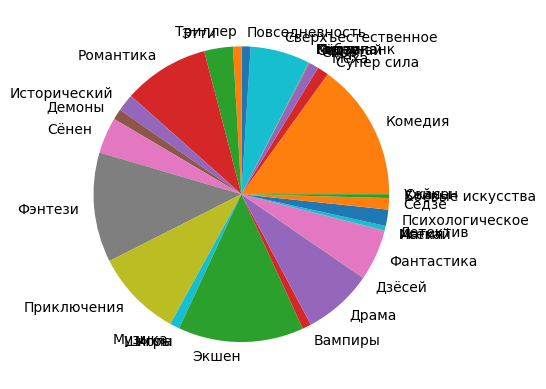

In [36]:
plt.pie(nplus.iloc[0], labels=nplus.columns)

In [19]:
def minus_some_y(ind:int, n: int):
    i = 0
    while n and i < len(y):
        if y[i][ind] == 1:
            n -= 1
            y[i][ind] = 0
        i += 1

In [20]:
minus_some_y(20, 450)

In [21]:
minus_some_y(21, 350)

In [22]:
minus_some_y(2, 300)

In [23]:
minus_some_y(6, 200)

In [24]:
minus_some_y(7, 200)

In [25]:
minus_some_y(10, 150)

In [26]:
minus_some_y(16, 100)

In [27]:
minus_some_y(28, 100)

In [28]:
minus_some_y(33, 150)

In [29]:
minus_some_y(0, 100)

In [30]:
minus_some_y(29, 100)

In [39]:
def removePunctuation(sentence): 
    sentence = re.sub(r'[?|!|\'|"|#–—-]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    sentence = sentence.strip()
    sentence = sentence.replace("\n"," ")
    return sentence

def removeNumber(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[0-9]', '', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def stemming(sentence):
    stemmer = SnowballStemmer("russian")
    stemmedSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemmedSentence += stem
        stemmedSentence += " "
    stemmedSentence = stemmedSentence.strip()
    return stemmedSentence

In [40]:
X_text = list(map(removePunctuation, X_text))
X_text = list(map(removeNumber, X_text))
X_text = list(map(stemming, X_text))
X_text

['сэйитир кита юнош с сердц ангел и лиц демон он тольк что перевел в школ хекику у нег отличн отметк превосходн характеристик и ещ лучш намерен а что толк кита бо и учител и ученик а тут ещ нелеп случайн столкнул ег со свиреп сэйкит курод тенев «боссом» школ но курод оказа так напуга лиц первогодки«отморозка» что сдал сво грозн титул практическ без бо так что тепер пацифист и отличник китаноса нов лидер драчун хэкику',
 'культов сериа о приключен двух охотник за голов спайк и джет бороздя простор солнечн систем на корабл бибоп и промышля охот на преступник за наград BDRip p HEVC HEVC FLAC BDRip p H FLAC BDRip p H AC',
 '«Trigun» известн в сво жанр космическ вестерн сериа повеств о парн по имен вэш урага и ег похожден с двум девушк из страхов агентств «бернарделли» сотрудниц агентств всюд след за вэш пыт свест к минимум те разрушен котор неизбежн появля вслед за приход вэш куд бы то ни был все дел в охотник за голов жаждущ получ наград в «$$ » шестьдес миллиард «двойн долларов» котор на

In [41]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=10000, lower=True)
tokenizer.fit_on_texts(X_text)
sequences = tokenizer.texts_to_sequences(X_text)
X = pad_sequences(sequences, maxlen=750)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=48)

In [603]:
X_train

array([[   0,    0,    0, ...,  579,   23,  135],
       [   0,    0,    0, ...,    2,  157,  371],
       [   0,    0,    0, ...,    8,  334, 1359],
       ...,
       [   0,    0,    0, ...,  285, 5972, 5902],
       [   0,    0,    0, ...,    2,  391,  111],
       [   0,    0,    0, ..., 9088,  520,  661]])

In [762]:
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from keras.models import Sequential
import tensorflow as tf
filter_length = 300
model = Sequential()
model.add(Embedding(10000, 20, input_length=750))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(34))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [12]:
import json

In [13]:
from keras.models import model_from_json
model = model_from_json(open("config.json", 'r').read())

TypeError: the JSON object must be str, bytes or bytearray, not dict

In [5]:
from huggingface_hub import from_pretrained_keras
model = from_pretrained_keras("Yueh-Huan/news-category-classification-distilbert")

config.json: 100%|██████████| 2.36k/2.36k [00:00<?, ?B/s]
Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]









special_tokens_map.json: 100%|██████████| 125/125 [00:00<00:00, 25.0kB/s]
.gitattributes: 100%|██████████| 1.48k/1.48k [00:00<00:00, 369kB/s]
Fetching 7 files:  14%|█▍        | 1/7 [00:00<00:05,  1.10it/s]
vocab.txt: 100%|██████████| 232k/232k [00:01<00:00, 172kB/s]


























tf_model.h5: 100%|██████████| 268M/268M [01:38<00:00, 2.71MB/s]
Fetching 7 files: 100%|██████████| 7/7 [01:40<00:00, 14.30s/it]


OSError: SavedModel file does not exist at: C:\Users\pbrag\.cache\huggingface\hub\models--Yueh-Huan--news-category-classification-distilbert\snapshots\fed5542b8c775f980459377abddc18d4f0b29dcc\{saved_model.pbtxt|saved_model.pb}

In [763]:
model.fit(X_train, y_train, epochs=1, batch_size=128)

9/9 [==============================] - 3s 191ms/step - loss: 0.6691 - auc_34: 0.5195


In [764]:
preds = model.predict(X_test, batch_size=128)

3/3 [==============================] - 0s 26ms/step


In [765]:
rrt = 0
rtt = 0
total = 0
ful_tot = 0
for i in range(len(preds)):
    pred = list(preds[i])
    answ = y_test[i]
    n_answ = list(answ).count(1)
    answ_indexes = []
    answ_copy = list(answ.copy())
    for j in range(n_answ):
        ind = answ_copy.index(1)
        answ_indexes.append(ind)
        answ_copy[ind] = 0
    pred_sorted = pred.copy()
    pred_sorted.sort()
    pred_sorted = pred_sorted[::-1]
    rt = 0
    ful_tot += 1
    for j in range(n_answ):
        if pred.index(pred_sorted[j]) in answ_indexes:
            rt += 1
            rtt += 1
            print(dataset.columns[pred.index(pred_sorted[j])])
        total += 1
    print(f"test {rt}/{n_answ}")
    if rt == n_answ: rrt += 1
print(f"{rrt}/{ful_tot} tests full passes")
print(f"{rtt}/{total} in total")

test 0/0
test 0/4
Приключения
test 1/2
test 0/1
test 0/1
test 0/1
test 0/1
test 0/0
test 0/1
test 0/2
test 0/1
test 0/2
test 0/3
test 0/0
test 0/0
test 0/1
test 0/2
test 0/3
Повседневность
test 1/4
test 0/2
test 0/1
test 0/1
test 0/0
test 0/1
test 0/1
test 0/2
test 0/3
Сёнен
test 1/2
test 0/0
test 0/2
test 0/0
test 0/0
Сёнен
test 1/4
test 0/2
test 0/0
test 0/0
test 0/0
Сёнен
test 1/2
test 0/3
test 0/3
test 0/1
test 0/0
test 0/1
test 0/3
test 0/2
test 0/2
test 0/3
test 0/2
test 0/2
Приключения
test 1/3
test 0/3
test 0/0
test 0/0
test 0/0
test 0/0
test 0/1
test 0/2
Сёнен
test 1/2
test 0/2
test 0/2
test 0/2
Сёнен
test 1/2
test 0/0
test 0/3
test 0/0
test 0/1
Сёнен
test 1/3
Приключения
test 1/3
test 0/1
test 0/0
test 0/1
test 0/1
test 0/1
test 0/3
test 0/0
test 0/0
test 0/0
test 0/1
Приключения
test 1/3
test 0/4
test 0/1
Приключения
test 1/4
test 0/0
test 0/1
test 0/1
test 0/3
test 0/1
test 0/0
test 0/2
test 0/1
test 0/1
test 0/1
test 0/1
Приключения
test 1/3
test 0/0
test 0/2
test 0/0
test

In [633]:
genres_n_to_genres_s = list(dataset.columns[1:])

In [634]:
genres_n_to_genres_s

['Повседневность',
 'Вампиры',
 'Фэнтези',
 'Исекай',
 'Детектив',
 'Этти',
 'Приключения',
 'Романтика',
 'Меха',
 'Супер сила',
 'Драма',
 'Сёдзе-ай',
 'Гарем',
 'Сёдзе',
 'Ужасы',
 'Киберпанк',
 'Фантастика',
 'Дзёсей',
 'Сейнен',
 'Мистика',
 'Комедия',
 'Экшен',
 'Магия',
 'Музыка',
 'Триллер',
 'Исторический',
 'Демоны',
 'Игры',
 'Сёнен',
 'Сверхъестественное',
 'Боевые искусства',
 'Психологическое',
 'Спорт',
 'Школа']

In [635]:
import json

In [636]:
json.dump(tokenizer.to_json(), open("tokenizer.json", 'w'))

In [637]:
def get_pred(desc: str, n_of_genres: int) -> str:
    assert n_of_genres < len(genres_n_to_genres_s)
    desc_seq = tokenizer.texts_to_sequences((desc, ))
    desc_seq = pad_sequences(desc_seq, maxlen=750)
    ara = (desc_seq, )
    preds = list(model.predict(ara, batch_size=256))[0]
    preds_sort = preds.copy()
    preds_sort.sort()
    preds_sort = preds_sort[::-1]
    answ = []
    for i in range(n_of_genres):
        answ.append(genres_n_to_genres_s[list(preds).index(list(preds_sort)[i])])
    return answ

In [756]:
text = "Мы снова встретимся с полюбившимися героями и понаблюдаем за тем, как они справляются с ежедневными вызовами и налаживают отношения друг с другом: узнаем, как поживает ленивый гений Киётаки Аянокоджи, сможет ли Кикё Кушида подружиться со всеми и сбудутся ли наконец мечты о переводе из бесперспективного класса D в элитный класс А. Сериалу будет чем нас удивить: во-первых и во-вторых, он наполнен смешными моментами и подробно раскрывает душевные переживания героев. В третьих, это вам не стандартная японская школа с ее строгими правилами. В стенах \"Кодо Икусей\" ученикам позволено практически всё! "
text = list(map(removePunctuation, text))
text = list(map(removeNumber, text))
text = list(map(stemming, text))
get_pred(text, 3)

1/1 [==============================] - 1s 832ms/step


['Этти', 'Приключения', 'Детектив']

In [405]:
text = "Кармическая справедливость — вещь крайне странная и может сыграть с Вами злую шутку, кармические же ошибки могут и вовсе довести ситуацию до абсурда. Айджо Рэнтаро как раз стал жертвой такой ошибки: он признался в любви сотне девушек и сотню раз был отвергнут, после чего в отчаянии обратился за помощью к высшим силам, которые внезапно ему ответили. Они рассказали, что подобные случаи действительно являются ошибкой и пообещали разобраться. В итоге всё перевернулась с ног на голову: теперь ему судьбой уготована встреча с сотней девушек, которые по уши в него влюблены. Вот только есть один нюанс: если он какой-то из этих девушек не ответит искренней любовью, то эта девушка умрёт от несчастного случая. Пока справедливость тихо плачет в уголке, Рэнтаро предстоит много работы, ведь он парень правильный и допустить подобного просто не может."
text = list(map(removePunctuation, text))
text = list(map(removeNumber, text))
text = list(map(stemming, text))
desc_seq = tokenizer.texts_to_sequences((text, ))
desc_seq = pad_sequences(desc_seq, maxlen=750)

In [406]:
model.predict((desc_seq, ), 256)

1/1 [==============================] - 0s 24ms/step


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.9642957e-13, 9.6229225e-01,
        0.0000000e+00, 1.0080717e-34, 2.0534629e-01, 5.3805427e-29,
        0.0000000e+00, 3.9300637e-16, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.3993504e-02, 1.4877050e-05,
        9.9977338e-01, 0.0000000e+00, 2.6642647e-07, 4.9092398e-35,
        0.0000000e+00, 5.5640067e-33, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00]], dtype=float32)

In [407]:
list(model.predict((desc_seq, ), 256))

1/1 [==============================] - 0s 30ms/step


[array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.9642957e-13, 9.6229225e-01,
        0.0000000e+00, 1.0080717e-34, 2.0534629e-01, 5.3805427e-29,
        0.0000000e+00, 3.9300637e-16, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.3993504e-02, 1.4877050e-05,
        9.9977338e-01, 0.0000000e+00, 2.6642647e-07, 4.9092398e-35,
        0.0000000e+00, 5.5640067e-33, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00], dtype=float32)]

In [337]:
X_test.shape

(311, 750)

In [338]:
desc_seq.shape

(1, 750)

In [339]:
X.shape

(1553, 750)

In [340]:
dataset[dataset.columns[11]]

0    1
0    1
0    0
0    0
0    0
    ..
0    1
0    0
0    0
0    0
0    0
Name: Драма, Length: 1362, dtype: int64

In [341]:
len(sequences)

1553

In [447]:
desc_seq.shape

(1, 750)